In [1]:
import pandas as pd

from data.create_dataset import *
from analysis_pipeline import *
from classification_model import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

100%|██████████| 60/60 [00:15<00:00,  3.89it/s]


Accuracy: 0.8333333333333334
AUC: 0.8716049382716049


100%|██████████| 30/30 [00:04<00:00,  7.26it/s]


Accuracy: 0.7777777777777778
AUC: 0.7527472527472527


100%|██████████| 90/90 [01:41<00:00,  1.13s/it]


Accuracy: 0.8636363636363636
AUC: 0.9166666666666666


100%|██████████| 60/60 [02:18<00:00,  2.31s/it]


Accuracy: 0.8947368421052632
AUC: 0.8888888888888888


100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


Accuracy: 0.8
AUC: 0.8333333333333333


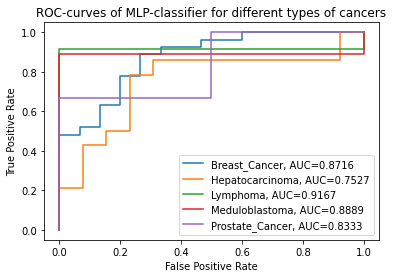

In [3]:
folder = '../data/'
%matplotlib inline
fig = plt.figure(0).clf()

ax = plt.axes()
ax.set_facecolor("white")

features = {"Breast_Cancer":60, "Hepatocarcinoma":30, "Lymphoma":90, "Meduloblastoma":60,"Prostate_Cancer":5}

cancer_types = ["Breast_Cancer", "Hepatocarcinoma", "Lymphoma", "Meduloblastoma", "Prostate_Cancer"]
# cancer_types = ["Breast_Cancer"]

for cancer_type in cancer_types:
    df, df_cancer, df_control = create_dataset_original(folder + cancer_type)

    confusion_matrix, fpr, tpr, thresh, auc, y_test, y_proba, y_pred = loocv_pipeline(df, df_cancer, df_control, cancer_type, features[cancer_type])

    tn, fp, fn, tp = confusion_matrix.ravel()
    print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
    print("AUC:", auc)

    plt.plot(fpr, tpr, label=cancer_type+f', AUC={round(auc,4)}')
    # skplt.metrics.plot_roc(y_test, y_proba)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-curves of MLP-classifier for different types of cancers")
plt.legend()
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()